In [ ]:
!git clone https://github.com/saisriteja/sample_paleru.git

Cloning into 'sample_paleru'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1851 (delta 0), reused 1 (delta 0), pack-reused 1848
Receiving objects: 100% (1851/1851), 413.07 MiB | 34.10 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Checking out files: 100% (1807/1807), done.


In [ ]:
%tensorflow_version 1.x
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,Bidirectional,LSTM,Reshape,CuDNNLSTM,BatchNormalization,Flatten,Dropout,Dense
from keras.layers import add
from keras.utils import plot_model

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
def resnet_model():
    input  = Input(shape = (256,256*4,1))

    c1 = Conv2D(64, (7,7), padding='same',strides=2,activation='relu', kernel_initializer='he_normal')(input)
    a1 = Activation('relu')(c1)

    c2 = conv1 = Conv2D(32, (3,3),strides=2, padding='same', kernel_initializer='he_normal')(input)
    b2 = BatchNormalization()(c2)
    a2 = Activation('relu')(b2)

    c3 = conv1 = Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal')(a2)
    b3 = BatchNormalization()(c3)
    a3 = Activation('relu')(b3)

    c4 = conv1 = Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal')(a3)
    b4 = BatchNormalization()(c4)

    m1  = add([a1, b4])
    a4 = Activation('relu')(m1)


    #-----------------------------------------------layer 2----------------------------------------------------------------------------

    c1 = Conv2D(128, (3,3),strides=2, padding='same',activation='relu', kernel_initializer='he_normal')(a4)
    a1 = Activation('relu')(c1)

    c2 = conv1 = Conv2D(64, (3,3),strides=2, padding='same', kernel_initializer='he_normal')(a4)
    b2 = BatchNormalization()(c2)
    a2 = Activation('relu')(b2)

    c3 = conv1 = Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal')(a2)
    b3 = BatchNormalization()(c3)
    a3 = Activation('relu')(b3)


    c4 = conv1 = Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal')(a3)
    b4 = BatchNormalization()(c4)

    m1  = add([c1, b4])
    a4 = Activation('relu')(m1)

    #----------------------------------------------layer 3------------------------------------------------------------------------------

    c1 = Conv2D(128, (3,3),strides = (1,2) ,padding='same',activation='relu', kernel_initializer='he_normal')(a4)
    a1 = Activation('relu')(c1)

    c2 = conv1 = Conv2D(128, (3,3),strides = (1,2), padding='same', kernel_initializer='he_normal')(a4)
    b2 = BatchNormalization()(c2)
    a2 = Activation('relu')(b2)

    c3 = conv1 = Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal')(a2)
    b3 = BatchNormalization()(c3)
    a3 = Activation('relu')(b3)


    c4 = conv1 = Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal')(a3)
    b4 = BatchNormalization()(c4)

    m1  = add([c1, b4])
    a4 = Activation('relu')(m1)

    #-------------------------------------------layer 4---------------------------------------------------------------------------------

    c1 = Conv2D(64, (3,3),strides = (2,2) ,padding='same',activation='relu', kernel_initializer='he_normal')(a4)
    a1 = Activation('relu')(c1)

    c2 = conv1 = Conv2D(128, (3,3),strides = (2,2), padding='same', kernel_initializer='he_normal')(a4)
    b2 = BatchNormalization()(c2)
    a2 = Activation('relu')(b2)

    c3 = conv1 = Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal')(a2)
    b3 = BatchNormalization()(c3)
    a3 = Activation('relu')(b3)


    c4 = conv1 = Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal')(a3)
    b4 = BatchNormalization()(c4)

    m1  = add([c1, b4])
    a4 = Activation('relu')(m1)

    #-------------------------------------------layer 5-----------------------------------------------------------------------------------
    c1 = Conv2D(32, (3,3),strides = (2,2) ,padding='same',activation='relu', kernel_initializer='he_normal')(a4)
    a1 = Activation('relu')(c1)

    c2 = conv1 = Conv2D(64, (3,3),strides = (2,2), padding='same', kernel_initializer='he_normal')(a4)
    b2 = BatchNormalization()(c2)
    a2 = Activation('relu')(b2)

    c3 = conv1 = Conv2D(64, (3,3), padding='same', kernel_initializer='he_normal')(a2)
    b3 = BatchNormalization()(c3)
    a3 = Activation('relu')(b3)


    c4 = conv1 = Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal')(a3)
    b4 = BatchNormalization()(c4)

    m1  = add([c1, b4])
    a4 = Activation('relu')(m1)

    #-----------------------------------------layer 6-------------------------------------------------------------------------
    c1 = Conv2D(16, (3,3),strides = (2,2) ,padding='same',activation='relu', kernel_initializer='he_normal')(a4)
    a1 = Activation('relu')(c1)

    c2 = conv1 = Conv2D(32, (3,3),strides = (2,2), padding='same', kernel_initializer='he_normal')(a4)
    b2 = BatchNormalization()(c2)
    a2 = Activation('relu')(b2)

    c3 = conv1 = Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal')(a2)
    b3 = BatchNormalization()(c3)
    a3 = Activation('relu')(b3)


    c4 = conv1 = Conv2D(16, (3,3), padding='same', kernel_initializer='he_normal')(a3)
    b4 = BatchNormalization()(c4)

    m1  = add([c1, b4])
    a4 = Activation('relu')(m1)

    f = Flatten()(a4)
    f = Reshape((int(8192/4), 1))(f)

    # #-----------------------------------------layer7---------------------------------------------------------------------------
    bi1 = Bidirectional(CuDNNLSTM(512, return_sequences=True))(f)
    d1  = Dropout(0.2)(bi1)

    bi2 = Bidirectional(CuDNNLSTM(512))(d1)
    d2 = Dropout(0.4)(bi2)

    out = Dense(2,activation='softmax')(d2)

    # create model
    model = Model(inputs=input, outputs=out)
    return model

In [ ]:
model = resnet_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


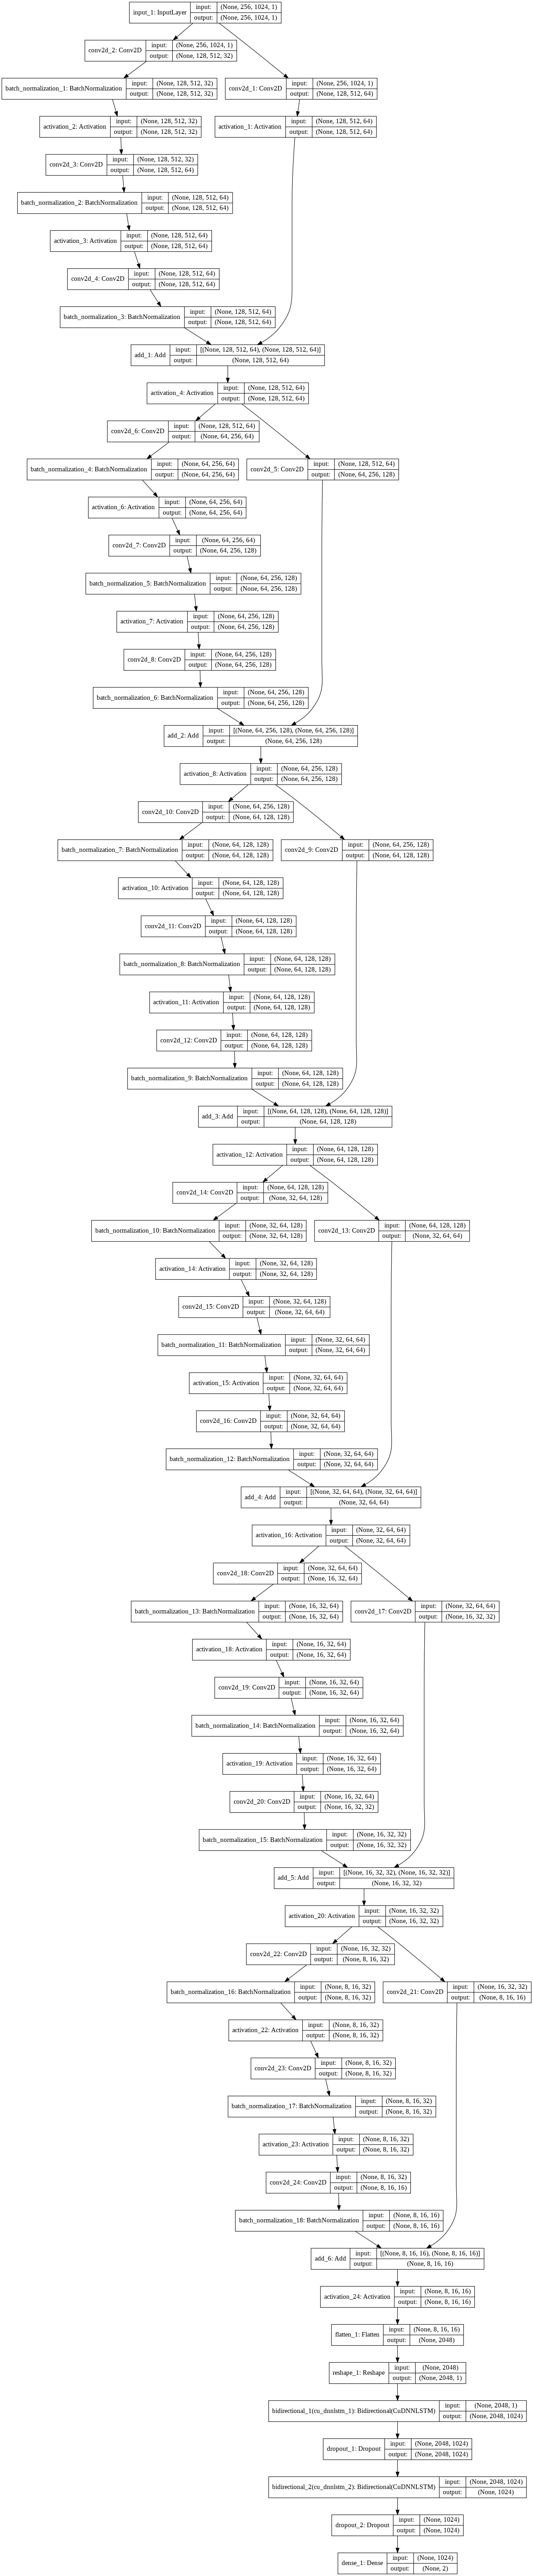

In [ ]:
plot_model(model, show_shapes=True, to_file='residual_module.png')

In [ ]:
!pip install librosa

In [ ]:
import shutil
shutil.rmtree('/content/sample_paleru/spectrograms')

In [ ]:
import os
os.mkdir('/content/sample_paleru/data')
os.mkdir('/content/sample_paleru/data/filler')
os.mkdir('/content/sample_paleru/data/nonfiller')

In [ ]:
import os
import matplotlib
matplotlib.use('Agg') # No pictures displayed 
import pylab
import librosa
import librosa.display
import numpy as np

def make_data(f,cat):
    root_dir = '/content/sample_paleru/data/'+str(cat)+'/'
    path_file = '/content/sample_paleru/UCLASS/'+f
    sig, fs = librosa.load(path_file)   
    # print(path_file)
    # make pictures name 
    name = f.split('/')[-1].split('.wav')[0]
    # print(name)
    save_path = root_dir + f'{name}.jpg'

    pylab.axis('off') # no axis
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge

    S = librosa.feature.melspectrogram(y=sig, sr=fs)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    
    pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
    pylab.close()

In [ ]:
import pandas as pd
data = pd.read_excel('/content/sample_paleru/UCLASS.xlsx')
data = data.fillna(False)
data = data[data['Text'] != False]

names = data['Name'].to_list()
names = [n.split('\\')[-1] for n in names]
category = data['Interjection'].to_list()

In [ ]:
import numpy as np
def manipulate(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data
import librosa
def manipulate_speed(data, speed_factor):
    return librosa.effects.time_stretch(data, speed_factor)
import librosa
def manipulate_pitch(data, sampling_rate, pitch_factor):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


In [ ]:
(88200-58880)/2

14660.0

In [ ]:
import pandas as pd
data = pd.read_excel('/content/sample_paleru/UCLASS.xlsx')
data = data.fillna(False)
data = data[data['Text'] != False]

names = data['Name'].to_list()
names = [n.split('\\')[-1] for n in names]
category = data['Interjection'].to_list()
fillers = data[data['Interjection'] != False]
filler_files = fillers['Name'].to_list()
filler_files = [i.split('\\')[-1] for i in filler_files]

In [ ]:
import os
os.mkdir('agumented_data')

In [ ]:
from tqdm import tqdm

In [ ]:
for i in tqdm(filler_files):
    data, sr = librosa.load('/content/sample_paleru/UCLASS/'+i)
    data1 = manipulate(data,0.1)
    d = np.zeros(data.shape)
    data2 = manipulate_speed(data,1.5)
    d[14660:-14660] = data2
    data3 = manipulate_pitch(data,sr,2)
    # print(data1.shape,d.shape,data3.shape,data2.shape)
    librosa.output.write_wav('/content/agumented_data/noise'+i, data1, sr)
    librosa.output.write_wav('/content/agumented_data/speed'+i, d, sr)
    librosa.output.write_wav('/content/agumented_data/pitch'+i, data3, sr)


100%|██████████| 322/322 [02:30<00:00,  2.14it/s]


In [ ]:
os.mkdir('nf_agumented_data')

In [ ]:
import pandas as pd
data = pd.read_excel('/content/sample_paleru/UCLASS.xlsx')
data = data.fillna(False)
data = data[data['Text'] != False]
fillers = data[data['Interjection'] == False]
filler_files = fillers['Name'].to_list()
filler_files = [i.split('\\')[-1] for i in filler_files]
for i in tqdm(filler_files):
    data, sr = librosa.load('/content/sample_paleru/UCLASS/'+i)
    data1 = manipulate(data,0.1)
    d = np.zeros(data.shape)
    data2 = manipulate_speed(data,1.5)
    d[14660:-14660] = data2
    data3 = manipulate_pitch(data,sr,2)
    # print(data1.shape,d.shape,data3.shape,data2.shape)
    librosa.output.write_wav('/content/nf_agumented_data/noise'+i, data1, sr)
    # librosa.output.write_wav('/content/nf_agumented_data/speed'+i, d, sr)
    # librosa.output.write_wav('/content/nf_agumented_data/pitch'+i, data3, sr)


100%|██████████| 598/598 [04:36<00:00,  2.16it/s]


In [ ]:
for i,j in tqdm(zip(names,category)):
    c = 'filler'
    if j == False:
        c = 'nonfiller'
    # print(c)
    make_data(i,c)

920it [06:06,  2.51it/s]


In [ ]:
def make_data(f,cat,p):
    root_dir = '/content/sample_paleru/data/'+str(cat)+'/'
    path_file = p+f
    sig, fs = librosa.load(path_file)   
    # print(path_file)
    # make pictures name 
    name = f.split('.wav')[0]
    # print(name)
    save_path = root_dir + f'{name}.jpg'
    pylab.axis('off') # no axis
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
    S = librosa.feature.melspectrogram(y=sig, sr=fs)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
    pylab.close()

for i in tqdm(os.listdir('/content/agumented_data')):
    make_data(i,'filler','/content/agumented_data/')




100%|██████████| 966/966 [05:13<00:00,  3.08it/s]


In [ ]:
for i in tqdm(os.listdir('/content/nf_agumented_data/')):
    make_data(i,'nonfiller','/content/nf_agumented_data/')

100%|██████████| 598/598 [03:13<00:00,  3.10it/s]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
# test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
path = '/content/sample_paleru/data'


train_generator = train_datagen.flow_from_directory(path,
                                                      target_size=(256,256*4),
                                                      batch_size=16,
                                                      class_mode="categorical",color_mode = 'grayscale',shuffle = True,subset='training')
validation_generator = train_datagen.flow_from_directory(path,
                                                      target_size=(256,256*4),
                                                      batch_size=16,
                                                      class_mode="categorical",color_mode = 'grayscale',shuffle = True,subset='validation')


Found 1988 images belonging to 2 classes.
Found 496 images belonging to 2 classes.


In [ ]:
print(np.unique(train_generator.classes, return_counts=True))
print(np.unique(validation_generator.classes, return_counts=True))

(array([0, 1], dtype=int32), array([1031,  957]))
(array([0, 1], dtype=int32), array([257, 239]))


In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train_generator.classes),
                                                 train_generator.classes,)

In [ ]:
from keras.metrics import categorical_accuracy

In [ ]:
from keras import optimizers
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
import keras.callbacks


In [ ]:
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=5, monitor="val_categorical_accuracy",min_delta=0.0001,verbose = 1),
    keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',verbose = 1,save_best_only=True),
    # keras.callbacks.TensorBoard(log_dir='./logs'),
    # keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.5,patience=1,cooldown = 1,verbose = 1)
]
model = resnet_model()
model.compile(loss='categorical_crossentropy',optimizer=optimizers.SGD(lr=1e-4),metrics=[categorical_accuracy])

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=2,
                              validation_data=validation_generator,
                              validation_steps=50,
                              # class_weight=class_weights,
                              callbacks = my_callbacks)


Epoch 1/2
100/100 [==============================] - 207s 2s/step - loss: 0.6935 - categorical_accuracy: 0.4975 - val_loss: 0.6945 - val_categorical_accuracy: 0.5200

Epoch 00001: val_loss improved from inf to 0.69446, saving model to model.01-0.69.h5
Epoch 2/2
100/100 [==============================] - 191s 2s/step - loss: 0.6936 - categorical_accuracy: 0.4963 - val_loss: 0.6917 - val_categorical_accuracy: 0.5088

Epoch 00002: val_loss improved from 0.69446 to 0.69173, saving model to model.02-0.69.h5


In [ ]:
model.load_weights('/content/model.01-0.69.h5')

In [ ]:
predictions = model.predict_generator(validation_generator)

In [ ]:
from sklearn import metrics
val_preds = np.argmax(predictions, axis=-1)
val_trues = validation_generator.classes
labels = validation_generator.class_indices.keys()
print(labels,val_trues,val_preds)
# precisions, recall, f1_score, _ = metrics.precision_recall_fscore_support(val_trues, val_preds, labels=labels)

dict_keys(['filler', 'nonfiller']) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
import copy
import warnings
warnings.filterwarnings('ignore')

import cv2
import keras
from keras import backend as K
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from keras.layers import Conv2D, Activation, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.resnet50 import preprocess_input, ResNet50
import matplotlib
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
def superimpose(img, cam):
    """superimpose original image and cam heatmap"""
    
    heatmap = cv2.resize(cam, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = heatmap * .5 + img * .5
    superimposed_img = np.minimum(superimposed_img, 255.0).astype(np.uint8)  # scale 0 to 255  
    superimposed_img = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
    
    return img, heatmap, superimposed_img

In [ ]:
%matplotlib inline

In [ ]:
def plot(model, cam_func, img, cls_true):
    
  i = img  
  x = np.expand_dims(img, axis=0)
  # x = preprocess_input(copy.deepcopy(x))

    # for superimpose
  img = np.uint8(img)

    # cam / superimpose
  cls_pred, cam = cam_func(model=model, x=x, layer_name='activation_48')
  img, heatmap, superimposed_img = superimpose(img, cam)

  fig, axs = plt.subplots(ncols=3, figsize=(18,5))

  axs[0].imshow(i.squeeze())
  axs[0].set_title('original image')
  axs[0].axis('off')

  axs[1].imshow(heatmap)
  axs[1].set_title('heatmap')
  axs[1].axis('off')

  axs[2].imshow(superimposed_img)
  axs[2].set_title('superimposed image')
  axs[2].axis('off')

  plt.suptitle('True label: ' + class_to_label[np.argmax(cls_true)] + ' / Predicted label : ' + class_to_label[cls_pred])
  plt.tight_layout()
  plt.show()

In [ ]:
def grad_cam(model, x, layer_name):
    """Grad-CAM function"""
    
    cls = np.argmax(model.predict(x))
    
    y_c = model.output[0, cls]
    conv_output = model.get_layer(layer_name).output
    grads = K.gradients(y_c, conv_output)[0]

    # Get outputs and grads
    gradient_function = K.function([model.input], [conv_output, grads])
    output, grads_val = gradient_function([x])
    output, grads_val = output[0, :], grads_val[0, :, :, :]
    
    weights = np.mean(grads_val, axis=(0, 1)) # Passing through GlobalAveragePooling

    cam = np.dot(output, weights) # multiply
    cam = np.maximum(cam, 0)      # Passing through ReLU
    cam /= np.max(cam)            # scale 0 to 1.0

    return cls, cam

In [ ]:
Images.shape,Classes.shape

((16, 256, 1024, 1), (16, 2))

In [ ]:
label_to_class = {
    'filler': 0,
    'nonfiller':    1
}
class_to_label = {v: k for k, v in label_to_class.items()}

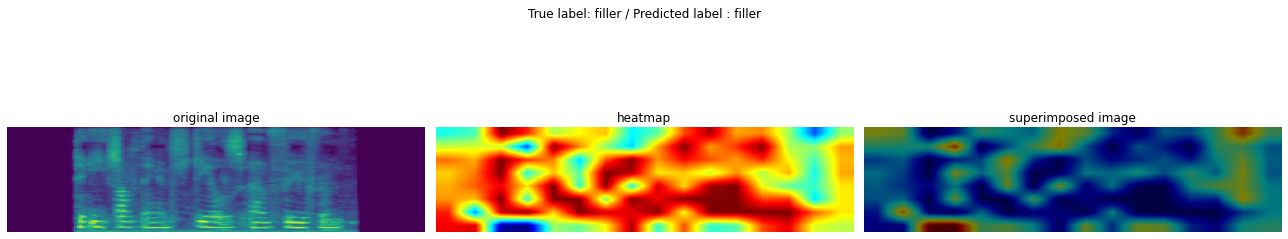

In [ ]:
Images,Classes = next(train_generator)
i = 8
plot(model=model, cam_func=grad_cam, img=Images[i], cls_true=Classes[i])